# Entregável 1 - visão computacional

In [17]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.0.0 


# Equalização de histograma

In [18]:
rintin = cv2.imread("RinTinTin.jpg")

In [19]:
rintin.shape

(240, 320, 3)

In [20]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [21]:
rintin_gray.shape

(240, 320)

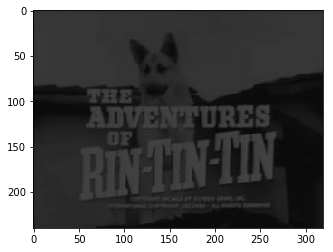

In [22]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

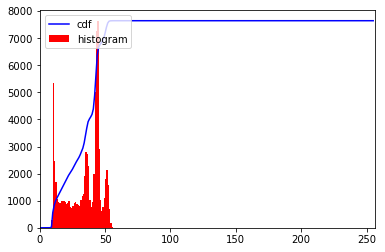

In [23]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [24]:
rintin_gray.max()

58

In [25]:
rintin_gray.min()

8

O histpgrama não aproveita bem a faixa de cores, pois tem seus pixels estão concentrados na faixa de 8 a 58; quando o ideal seria que utilizasse a faixa de 0 a 255.

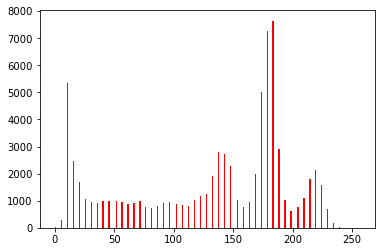

In [26]:
rintin_Eq = rintin_gray.copy()
rintin_max = rintin_gray.max()
rintin_min = rintin_gray.min()

for i in range(len(rintin_Eq)):
    for j in range(len(rintin_Eq[0])):
        rintin_Eq[i][j] = ((rintin_Eq[i][j]-rintin_min) * 255 / (rintin_max - rintin_min))
        
plt.hist(rintin_Eq.flatten(), 256, [0, 256], color = 'r')
plt.show()

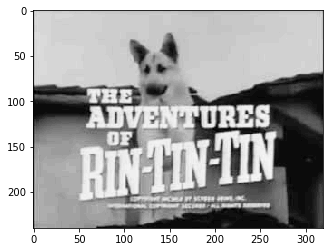

In [27]:
plt.imshow(rintin_Eq, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


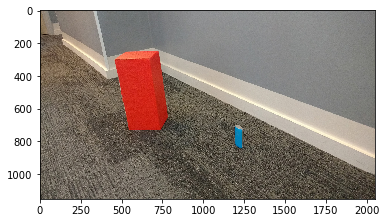

In [28]:
imagem = cv2.imread("hall_box_battery1.jpg")
imagem_norm = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGBA)
plt.imshow(imagem_norm, cmap="Greys_r", vmin=0, vmax=255)

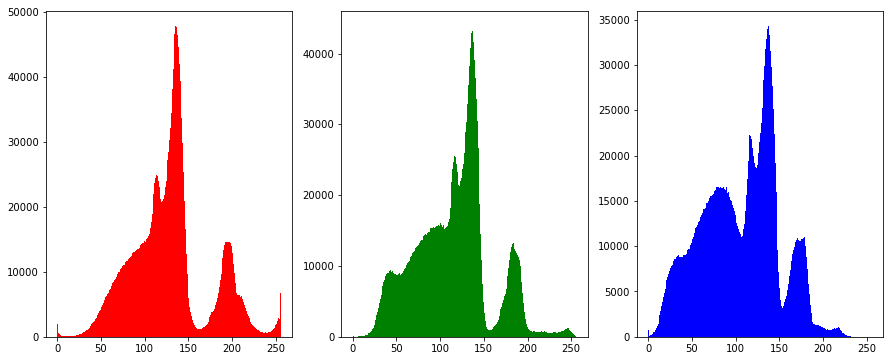

In [29]:
hist,bins = np.histogram(imagem_norm.flatten(), 256, [0, 256])

fig, ax = plt.subplots(1, 3, figsize = (15,6))


ax[0].hist(imagem_norm[:,:,0].flatten(),256,[0,256], color = "r")
ax[1].hist(imagem_norm[:,:,1].flatten(),256,[0,256], color = "g")
ax[2].hist(imagem_norm[:,:,2].flatten(),256,[0,256], color = "b")

plt.show()

In [57]:
imagem = cv2.imread("hall_box_battery1.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

def CaixaBranca(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            
            if img[i, j, 0] > 160 and img[i, j, 1] < 160 and img[i, j, 2] < 160:
                img[i, j] = [255, 255, 255]
                
            else:
                img[i, j] = [0, 0, 0]
    return img

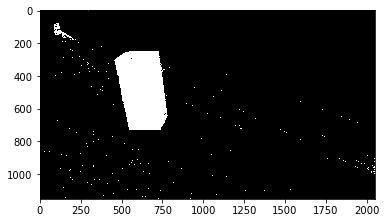

In [58]:
plt.imshow(CaixaBranca(imagem), vmin = 0, vmax = 255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele.

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [81]:
imagem = cv2.imread("hall_box_battery_atividade3.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

def Deriva(imagem):
    new_image = imagem.copy()
    for i in range(len(imagem)):
        for j in range(1,len(imagem[i])-1):
            new_image[i][j] = abs(int(imagem[i][j + 1]) - int(imagem[i][j - 1]))
            
    return new_image

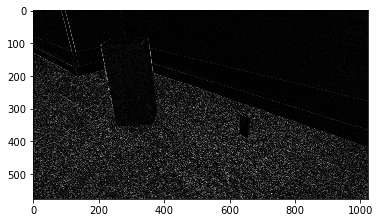

In [82]:
plt.imshow(Deriva(imagem),cmap="Greys_r", vmin = 0, vmax = 255)